# URL Link to QR Code Translation:

In [103]:
import qrcode
import pandas as pd
from IPython.display import display
import numpy as np
import os
from PIL import Image

In [104]:
url1 = "google.com"

### Importing Phishing Dataset:

In [105]:
path = r"C:\Users\loera\Documents\Datasets\Phishing_URLs\PhiUSIIL_Phishing_URL_Dataset.csv"

In [106]:
# Removing the filename from the DataFrame
dataset = pd.read_csv(path)
dataset.drop("FILENAME", axis=1, inplace=True)
dataset.head()

,URL,URLLength,Domain,DomainLength,IsDomainIP,TLD,URLSimilarityIndex,CharContinuationRate,TLDLegitimateProb,URLCharProb,...,Pay,Crypto,HasCopyrightInfo,NoOfImage,NoOfCSS,NoOfJS,NoOfSelfRef,NoOfEmptyRef,NoOfExternalRef,label
0,https://www.southbankmosaics.com,31,www.southbankmosaics.com,24,0,com,100.0,1.000000,0.522907,0.061933,...,0,0,1,34,20,28,119,0,124,1
1,https://www.uni-mainz.de,23,www.uni-mainz.de,16,0,de,100.0,0.666667,0.032650,0.050207,...,0,0,1,50,9,8,39,0,217,1
2,https://www.voicefmradio.co.uk,29,www.voicefmradio.co.uk,22,0,uk,100.0,0.866667,0.028555,0.064129,...,0,0,1,10,2,7,42,2,5,1
3,https://www.sfnmjournal.com,26,www.sfnmjournal.com,19,0,com,100.0,1.000000,0.522907,0.057606,...,1,1,1,3,27,15,22,1,31,1
4,https://www.rewildingargentina.org,33,www.rewildingargentina.org,26,0,org,100.0,1.000000,0.079963,0.059441,...,1,0,1,244,15,34,72,1,85,1


### Initializing Translator:

In [107]:
qr_translator = qrcode.QRCode(version=1, # controls size of QR code
                              error_correction=qrcode.constants.ERROR_CORRECT_M,
                              box_size=7, # size of each box in pixels
                              border=2 # thickness of border
                              )

### Adding and Compiling Data: 

In [108]:
# Adds data to QR translator
qr_translator.add_data(url1)

# Compiling data into QR code arrays
qr_translator.make()

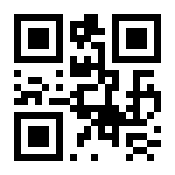

In [109]:
# Displaying QR code
qr_image = qr_translator.make_image()
display(qr_image)

In [110]:
# Printing QR code as a binary matrix
matrix = qr_translator.get_matrix()
matrix = np.array(matrix)
bin_matrix = matrix.astype(int)
print("Shape:", bin_matrix.shape)
for row in bin_matrix:
    print(row)

Shape: (25, 25)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[0 0 1 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 1 1 0 0]
[0 0 1 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0]
[0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0]
[0 0 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 1 1 1 0 1 0 0]
[0 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 0 1 0 0]
[0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0]
[0 0 1 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0]
[0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 0 0 0]
[0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 0 0 0]
[0 0 1 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 1 0 1 0 0 0]
[0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 1 1 1 1 1 0 0]
[0 0 1 1 0 1 0 1 1 1 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0]
[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 0]
[0 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 1 0 1 0 0 0]
[0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
[0 0 1 0 1 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 1 0

### Generating QR Data for Entire Dataset:

In [ ]:
def resize_qr_data(qr_image: qrcode.QRCode, fixed_size: tuple=(256,256)) -> qrcode.QRCode:
    """
    Reshapes the QR image to the desired fixed size.
    
    Args:
        qr_image: The QR image that is being resized
        fixed_size: An nxn tuple that will determine the new shape of the QR image
        
    Returns:
        The resized QR image
    """
    # Resizing QR image
    qr_image = qr_image.resize(fixed_size, Image.NEAREST)
    
    return qr_image

In [120]:
def generate_qr_data(dataset: pd.DataFrame, translator: qrcode.QRCode, save_path: str) -> None:
    """
    Iterates through the inputted DataFrame. For each URL link, its translated QR image is saved as a PNG and its QR matrix is saved 
    as a binary file. Finally, all QR labels are saved as a CSV file.
    
    Args:
        dataset: The DataFrame containing all URL links and labels
        translator: An intialized QR translator
        save_path: The directory where all images, matrices, and labels will be stored
        
    Returns:
        None:
    """
    urls = dataset.loc[:, "URL"]
    print("Starting Tranlator Version:", translator.version)
    
    for i, url in enumerate(urls):
        # Defining save path for QR image
        qr_image = f"img_{i}.png"
        qr_image_path = os.path.join(save_path, "qr_images", qr_image)
        
        # Defining save path for QR matrix
        qr_matrix = f"matrix_{i}"
        qr_matrix_path = os.path.join(save_path, "qr_matrices", qr_matrix)
        
        try:
            # Tranlating current URL to QR image
            translator.add_data(url)
            translator.make()
            qr_code = translator.make_image()
            
            # Resizing the QR image
            qr_code = resize_qr_data(qr_code)
            
            # Extracting QR matrix and saving at as a binary file
            qr_matrix = translator.get_matrix()
            np.save(qr_matrix_path, qr_matrix)        
        
            # Saving the QR image as a PNG
            qr_code.save(qr_image_path)
        
        except ValueError as e:
            if "Invalid version" in str(e):
                print(f"Skipping URL {i} - too long for QR code: {url[:50]}...")
            else:
                print(f"Error processing URL {i}: {e}")
        
        # Clearing translator for next URL
        translator.clear()
    
        # Resets the version of the translator when it encounters large URL links
        translator.version = 1
            
    # Saving QR labels as a CSV file
    qr_labels_path = os.path.join(save_path, "qr_labels.csv")    
    qr_labels = dataset["label"]
    qr_labels.to_csv(qr_labels_path)

In [121]:
save_path = r"C:\Users\loera\Documents\Datasets\Phishing_URLs\qr_codes"
generate_qr_data(dataset, qr_translator, save_path)

Starting Tranlator Version: 6
Skipping URL 9650 - too long for QR code: https://b4e921f0.sso-mailsrvr-4344e5teed.pages.dev...
Skipping URL 102933 - too long for QR code: https://xwebhostapp.github.io/freehost//#eyj2zxjza...
Skipping URL 145392 - too long for QR code: https://inspirationalatmospheres.com/qxzrrr%20rrqw...
Skipping URL 146920 - too long for QR code: http://www.inspirationalatmospheres.com/qxzrrr%20r...
Skipping URL 149799 - too long for QR code: https://ssiol.lt.emlnk.com/prod/link-tracker?notra...
Skipping URL 150870 - too long for QR code: https://bodhicardstech.com/beta/wx%20qz%20xx%20ww%...
Skipping URL 152736 - too long for QR code: https://bodhicardstech.com/beta/wx%20qz%20xx%20ww%...
Skipping URL 157284 - too long for QR code: https://inspirationalatmospheres.com/qxzrrr%20rrqw...
